In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression

firstly , we are creating a dataframe with  a particular trend


In [5]:

df  = pd.DataFrame({ 'x1' : np.arange(1,101),
                     'x2':np.arange(1,101) +100, 
                    'x3':np.arange(1,101) +200,
                    'y' : np.arange(1,101)+ 50
                    
                             })

In [6]:
x = df.iloc[:,:-1].values  #seperating the dependent and independent variables
y = df.iloc[:,-1].values.reshape(-1,1)

In [7]:
lm = LinearRegression()
lm.fit(x, y)
print( 'coefficients: {}  and bias {}'.format(lm.coef_ , lm.intercept_))
y_pred = lm.predict(x)
print('Error : {}'.format( (y_pred - y).sum()  ))
print('Mean Squared Error : {} '.format( ((y_pred - y)**2).sum()  ) )

coefficients: [[0.33333333 0.33333333 0.33333333]]  and bias [-50.]
Error : 8.668621376273222e-13
Mean Squared Error : 3.130200071916975e-26 


INFERENCE:
Errors are negligible , ie, model is able to learn smoothly due to a pattern in the data

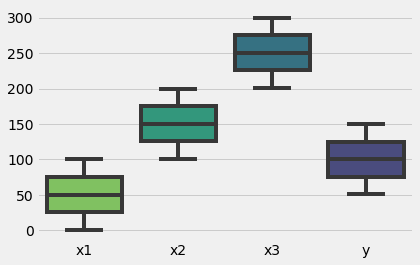

In [8]:
plt.style.use(plt.style.available[4]) 
sns.boxplot(data = df , palette= plt.colormaps()[167])  

#predictions

In [9]:
lm.predict([[450, 550, 650] , [1000,1100,1200]])  # output is predicted accurately since the new data follows the given pattern

array([[ 500.],
       [1050.]])

In [10]:
lm.predict([[12,56,768], [134,6,87]])  # this data deviates from the given pattern , hence the prediction will be wrong 
                                         # but ground truth is not given

array([[228.66666667],
       [ 25.66666667]])

# OUTLIER INFLUENCE

In [11]:
df  = pd.DataFrame({ 'x1' : np.arange(1,101),
                     'x2':np.arange(1,101) +100, 
                    'x3':np.arange(1,101) +200,
                    'y' : np.arange(1,101)+ 50
                    
                             })

new =  pd.DataFrame({ 'x1': [12,2354,675,456,4576,567234,5675],
                     'x2':[567,98,5436,879,523456,72,4351],
                    'x3':[7684,2345,877,754,78654,1234,98767],
                    'y' : [234,546,878 ,4678,345,6243,5132]
                    
                             })

df = df.append(new , ignore_index= True )

In [12]:
df

,x1,x2,x3,y
0,1,101,201,51
1,2,102,202,52
2,3,103,203,53
3,4,104,204,54
4,5,105,205,55
...,...,...,...,...
102,675,5436,877,878
103,456,879,754,4678
104,4576,523456,78654,345
105,567234,72,1234,6243


In [13]:
x = df.iloc[:,:-1].values  #seperating the dependent and independent variables
y = df.iloc[:,-1].values.reshape(-1,1)

In [14]:
lm = LinearRegression()
lm.fit(x, y)
print( 'coefficients: {}  and bias {}'.format(lm.coef_ , lm.intercept_))
y_pred = lm.predict(x)
print('Error : {}'.format( (y_pred - y).sum()  ))
print('Mean Squared Error : {} '.format( ((y_pred - y)**2).sum()  ) ) 

coefficients: [[ 0.01065935 -0.00722855  0.05026127]]  and bias [140.27856459]
Error : -4.433786671143025e-12
Mean Squared Error : 21284574.663520463 


In [15]:
psum ,nsum = 0 , 0
for i in (y_pred - y):    
    if i <0:
        nsum = nsum + i
    else:
        psum = psum + i
        
psum,nsum
        
    

(array([5490.53434271]), array([-5490.53434271]))

In [16]:
lm.predict([[450, 550, 650] , [1000,1100,1200]])  # data different from above

array([[173.76939514],
       [203.3000333 ]])

In [17]:
lm.predict([[12,56,768], [134,6,87]])

array([[178.60233313],
       [146.03627606]])

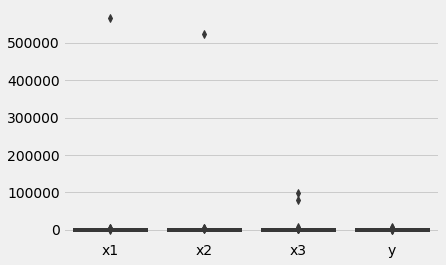

In [18]:
plt.style.use(plt.style.available[4]) 
sns.boxplot(data = df , palette= plt.colormaps()[167])  

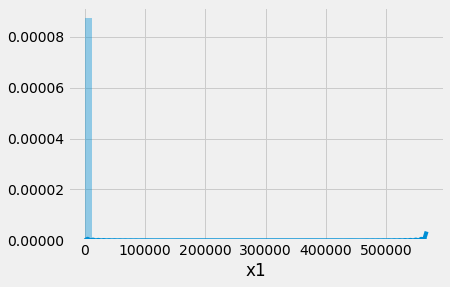

In [19]:
sns.distplot(df['x1'])

# Normalisation

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss =  StandardScaler()


In [22]:
df  = pd.DataFrame({ 'x1' : np.arange(1,101),
                     'x2':np.arange(1,101) +100, 
                    'x3':np.arange(1,101) +200,
                    'y' : np.arange(1,101)+ 50
                    
                             })

new =  pd.DataFrame({ 'x1': [12,2354,675,456,4576,567234,5675],
                     'x2':[567,98,5436,879,523456,72,4351],
                    'x3':[7684,2345,877,754,78654,1234,98767],
                    'y' : [234,546,878 ,4678,345,6243,5132]
                    
                             })

df = df.append(new , ignore_index= True )

In [23]:
df = ss.fit_transform(df)
x = df[:,:-1] #seperating the dependent and independent variables
y = df[:,-1].reshape(-1,1)
x,y

(array([[-1.00351583e-01, -1.00071089e-01, -1.50136065e-01],
        [-1.00333257e-01, -1.00051227e-01, -1.50053198e-01],
        [-1.00314931e-01, -1.00031365e-01, -1.49970330e-01],
        [-1.00296605e-01, -1.00011503e-01, -1.49887462e-01],
        [-1.00278279e-01, -9.99916415e-02, -1.49804595e-01],
        [-1.00259953e-01, -9.99717796e-02, -1.49721727e-01],
        [-1.00241627e-01, -9.99519176e-02, -1.49638859e-01],
        [-1.00223301e-01, -9.99320557e-02, -1.49555992e-01],
        [-1.00204976e-01, -9.99121938e-02, -1.49473124e-01],
        [-1.00186650e-01, -9.98923319e-02, -1.49390256e-01],
        [-1.00168324e-01, -9.98724699e-02, -1.49307389e-01],
        [-1.00149998e-01, -9.98526080e-02, -1.49224521e-01],
        [-1.00131672e-01, -9.98327461e-02, -1.49141653e-01],
        [-1.00113346e-01, -9.98128841e-02, -1.49058786e-01],
        [-1.00095020e-01, -9.97930222e-02, -1.48975918e-01],
        [-1.00076694e-01, -9.97731603e-02, -1.48893050e-01],
        [-1.00058368e-01

In [24]:
ss.var_

array([2.97761159e+09, 2.53487809e+09, 1.45622955e+08, 7.67753304e+05])

In [25]:
lm = LinearRegression()
lm.fit(x, y)
print( 'coefficients: {}  and bias {}'.format(lm.coef_ , lm.intercept_))
y_pred = lm.predict(x)
print('Error : {}'.format( (y_pred - y).sum()  ))
print('Mean Squared Error : {} '.format( ((y_pred - y)**2).sum()  ) ) 

coefficients: [[ 0.66382517 -0.41535421  0.69220945]]  and bias [-2.74351964e-17]
Error : -3.066991105526995e-15
Mean Squared Error : 27.723195128649227 
